# LIBRARY

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math
import csv
import pandas as pd 
import io

# REAL DATA

In [ ]:
#MAIN DATA ADJUSTMENT:
init_dat = 92        #Choose an initial value of CO2 from the file
lst = 288            #No. data read in csv file from the initial value
step = 300            #Step of data estimated (estimated line): 5min
around = 1            # 'around' values will be replaced by 1 mean value to calculate average line (real data plot average line)
eraround = 1         # 'around' values will be replaced by 1 mean value to calculate average line (error of real data plot average line)
tscale = 5*60         #Time scale of every real data plot (average line): 5min

In [ ]:
#IMPORTING REAL DATA:
df = pd.read_csv('Greenhouse_climate.csv') 
realCO2air = df.iloc[init_dat: lst+init_dat , 2].values.tolist()
nonanrealCO2air = df.iloc[: , 2].dropna().values.tolist()
realt = [0,]
#realt.append(temp)
maxrealCO2air = len(realCO2air) -1
#maxrealCO2air = 288*4 - 1
#Unit Adjustment:

b = 1
for i in range(0, maxrealCO2air):
  if not math.isnan(realCO2air[i]):
    realCO2air[i] = realCO2air[i]*(44/24.45)
    if b:
      fstrealCO2air = realCO2air[i]
      b = 0
  else:
    realCO2air[i] = realCO2air[i]
 
for i in range(0, maxrealCO2air):
    realt.append(realt[-1] + 1)

In [ ]:
#AVERAGE LINE:
def averageline(value, ah, timescale):
  at = []
  avalue = [fstrealCO2air,]
  maxvalue = len(value) - 1
 
  for i in range(0, round(maxvalue/ah)):
      at.append(ah*i*timescale)
      sum = 0
      for j in range(0, ah):
        if (at[i]//timescale+j+1) == maxvalue:
          break
        if not math.isnan(value[at[i]//timescale+j+1]):
          sum = sum + value[at[i]//timescale+j+1]
      if sum != 0:
        avalue.append(sum//ah)
      else:
        avalue.append(avalue[-1])
  at.append(ah*round(maxvalue//ah)*timescale)
  return {'avalue': avalue, 'at': at}

# GREENHOUSE PARAMETERS

In [ ]:
class greenhouseParameters():
    def __init__(self):
 
        ################# CO2 CONCENTRATION VALUES #################
 
        #Greenhouse parameters
        self.h_mean         =       4.2
        self.h_Air          =       3.8
        self.cap_CO2_Air    =       self.h_Air             #(m)
        self.cap_CO2_Top    =       self.h_mean  - self.h_Air            #(m)
        self.A_Flr          =       14000.0         #(m^2)              (a greenhouse design in Netherland)
 
        #Environment parameters
        self.CO2_Out        =       1050.0       
        self.T_Out          =       285.0                                   #(K)
        self.T_Air          =       293.0                                   #(K)
        self.T_Air_mean     =       (self.T_Out + self.T_Air) / 2          #(K)
        self.T_Top          =       293.0                                    #(K)
        self.rho_Air        =       1.20062             #(kg m^−3)
        self.rho_Air_mean   =       1.21929             #(kg m^−3)
        self.rho_Top        =       1.20062            #(kg m^−3)
        self.g              =       9.80665         #(m s^−2)
 
        #Heater
        self.eta_HeatCO2    =       0.057           #(mgCO2 J^−1)
        self.U_Blow         =       0.5             #[0,1]
        self.P_Blow         =       500000        #(W)
 
        #Third party
        self.c_HEC_in       =       1.86          # Convective heat exchange parameter between cover and outdoor air that depends on the greenhouse shape, Netherlands (W m^-2 K^-1)
        self.A_Cov          =       1.0           #(m^2)
        self.U_ExtCO2       =       0.5           #[0,1]
        self.phi_ExtCO2     =       720.0         #(mg s^−1)          
 
        #Pad system
        self.U_Pad          =       0.5             #[0,1]
        self.phi_Pad        =       16.7            #(m^3 s^−1)         (a greenhouse design in Arizona)
 
        #Thermal screen
        self.U_ThScr        =       0.5             #[0,1]
        self.K_ThScr        =       0.00005         #(m K^(−2/3) s^−1)
        self.T_ThScr        =       285.0           #(K)                (a greenhouse design in Netherland)
 
        #Fan system
        self.C_d            =       0.75                
        self.C_w            =       0.09             
        self.U_Roof         =       1.0             #[0,1]
        self.U_Side         =       0.0             #[0,1]
        self.A_Roof         =       0.1 * self.A_Flr #(m)               (a greenhouse design in Netherland)
        self.A_Side         =       0.0 * self.A_Flr            #(m)             
        self.v_Wind         =       7.238367             #(m s^−1)
        self.h_Roof         =       0.68            #(m)
        self.h_SideRoof     =       (self.h_Air / 2) + self.h_Roof       #(m)                (a greenhouse design in Netherland)
        self.zeta_InsScr    =       1.0             #                   (a greenhouse design in Netherland)
        self.c_leakage      =       0.0001          #                   (a greenhouse design in Netherland))
        self.eta_Side_Thr   =       0.9             #                   (assume)
        self.eta_Side       =       0.5
        self.U_VentForced   =       0.5             #[0,1]
        self.phi_VentForced =       1.0                  
        self.eta_Roof       =       1.0             #                   (assume)
        self.eta_Roof_Thr   =       0.9
 
        #Plant parameter
        self.M_CH2O         =       0.030031
        self.C_Buf          =       15000.0
        self.C_Buf_max      =       20000.0         #                   (assume)
        self.Res            =       2.5             #(s m^−1)           (normalized)
        self.CO2_0c5        =       11500           #(muy mol m^-3)(take average Kc of all C3 plants)Figure 1: https://watermark.silverchair.com/erm283.pdf?token=AQECAHi208BE49Ooan9kkhW_Ercy7Dm3ZL_9Cf3qfKAc485ysgAAApswggKXBgkqhkiG9w0BBwagggKIMIIChAIBADCCAn0GCSqGSIb3DQEHATAeBglghkgBZQMEAS4wEQQMXMVp0sOaUXka9zwBAgEQgIICTiBcgYw8N2YerErDqGyz8yKf2mObFFTeEsIXzhOtEgYlFmTos8MR1XDFpK9XA66NSBd-ZhfLs7esml49vVWue79IyV1CjwQN_gnqq-IAw2RkRTKPV14dCf88hCwR7EKH2Aea0pDrT_yBKUUCpydUmvh-jP3Ga-LYg7jU2U8pUWCRQYvqM3bZQnUmpOVVMNw_8bSLRNaEB9h_LTvJwg8imAEBQX2cQYnTFBVacyU2teMvfGW0LCbF4Vy5eNUfW_jmnSoxBVmiD1XWlhxGCpHB1OsMeb-Z2aFm-bPPCg9c0PC1ZW_YWR53UzhiLGcJ9V5N04gGjjVqbtbZE04lsNxiDBfesbKPe3Bgd5INbAiu8PjPgnPM0YfKFvPOyLPqP9Hw2i85ykAuxkONbPtcySv2M9WhbxBW3OmCP1pntJRTLvZvehGAklkcJ2voON6VDkz0IVog61_VXKX1RyPvFWqUaGTIaRjcfF46FfbcbcQOCcVM1840IZD8w1ElFyVHMjkEffYRNQ_P7ciLl93-cPMkdED882j6ocDI3iCMaCzXauLKME2nDOL1PRpgZUdqcOWFfgbeTwsfAFRc5fJHKAG9H9SOArlIjv9li7l6ElmDskYlArAEMEh_axVKw5p8aqYflS2wQX_d7z-ZQlZEu8JYZvq5n21BxRmqDFpdDcrj7NwLLQX08D6Vupc71GncMZtqGhhr4xezGm4JqtC4eGuBkS8_bcHSCv0j-1zUxW80qXI3rP2iF5LnWSL5Ifs9bS5W2KPtLF4fbKcN-CIqhh1Z
        self.H_d            =       220000.0        #(J mol^−1)
        self.H_a            =       37000.0         #(J mol^−1)
        self.S              =       710.0           #(J mol^−1 K^−1)
        self.T_0            =       298.15          #(K)
        self.R              =       8.314           #(J mol^-1 K^-1)
        self.LAI            =       3.0
        self.L_0            =       200.0
        self.K              =       0.9               #[0.7,1]          (Cucumber)
        self.m              =       0.1               #                 (assume)
        self.L_0c5          =       200.0
        self.P_MLT          =       4.75              #P_Max when running T (Figure 22)
 
 
        ################# VAPOR PRESSURE VALUES #################
 
        self.M_Water        =       18              #(kg kmol^-1) 8.13tables
        self.cap_VP_Air     =       1000 * (self.M_Water * self.h_Air) / (self.R * self.T_Air)              #(kg m J^-1)
        self.cap_VP_Top     =       1000 * (self.M_Water * (self.h_mean - self.h_Air)) / (self.R * self.T_Top)
        self.U_Fog          =       1.0
        self.T_MechCool     =       275.0           #(K)                  
        self.T_Covin        =       280.0           #(K)                  (a greenhouse design in Netherland)
        self.T_Can          =       280.0
        self.VP_Mech        =       self.compute_VP_T(self.T_MechCool)
        self.VP_Covin       =       self.compute_VP_T(self.T_Covin)
        self.VP_Can         =       self.compute_VP_T(self.T_Can)
        self.VP_Out         =       self.compute_VP_T(self.T_Out)
        self.VP_ThScr        =      self.compute_VP_T(self.T_ThScr)
        self.phi_Fog        =       0.0   #capacity of the fogging system(kg water s^-1)
        self.c_p_Air        =       1.0
        self.gamma          =       65.8  #Psychrometric constant(Pa K^-1)
        self.R_Can          =       5.0   #Radiation value aboce the canopy when the night becomes day and vice versa(W m^-2)
        self.c_evap1        =       4.30  #Coefficient of the stomatal resistance model to account for radiation effect(W m^-2)
        self.c_evap2        =       0.54  #Coefficient of the stomatal resistance model to account for radiation effect(W m^-2)
        self.c_evap3        =       6.1 * 10**(-7)  #Coefficient of the stomatal resistance model to account CO2 effect (ppm^-2)
        self.c_evap4        =       4.3 * 10**(-6)  #Coefficient of the stomatal resistance model to account for vapor pressure difference (Pa^-2)
        self.x_Pad          =       1.0
        self.x_Out          =       1.0
        self.theta_HeatVap  =       1.0
        self.theta_Pad      =       0.0   #[m^-3 s^-1]
        self.U_MechCool     =       0.0   
        self.COP_MechCool   =       1.0   #Coefficient of performance of the mechanical cooling system
        self.P_MechCool     =       0.0   #[W]
        self.s_MV           =       -0.1  # Pa^-1
        self.theta_mg_ppm   =       1.0
        self.r_b            =       275   #Boundary layer resistance of the canopy for vapour transport (s m^-1)
        self.r_s_min        =       82.0  #The minimum canopy resistance for transpiration (s m^-1)
        self.delta_H        =       2.45 * 10**(6)    #Latent heat of evaporation (J kg^-1 water)
 
    def compute_VP_T(self, T):
        return 610.78 * math.e**((T - 273.15) / ((T - 273.15) + 238.3) * 17.2694)

# GREENHOUSE CO2 SYSTEM

In [ ]:
class greenhouseCO2system:
    def __init__(self, parameters):
        self.cap_CO2_Air    =       parameters.cap_CO2_Air
        self.cap_CO2_Top    =       parameters.cap_CO2_Top
        self.eta_HeatCO2    =       parameters.eta_HeatCO2
        self.U_Blow         =       parameters.U_Blow
        self.P_Blow         =       parameters.P_Blow
        self.A_Flr          =       parameters.A_Flr
        self.U_ExtCO2       =       parameters.U_ExtCO2
        self.phi_ExtCO2     =       parameters.phi_ExtCO2
        self.U_Pad          =       parameters.U_Pad
        self.phi_Pad        =       parameters.phi_Pad
        self.U_ThScr        =       parameters.U_ThScr
        self.K_ThScr        =       parameters.K_ThScr
        self.T_Out          =       parameters.T_Out
        self.T_Air          =       parameters.T_Air
        self.T_Air_mean     =       parameters.T_Air_mean
        self.T_Top          =       parameters.T_Top
        self.rho_Air        =       parameters.rho_Air
        self.rho_Air_mean   =       parameters.rho_Air_mean
        self.rho_Top        =       parameters.rho_Top
        self.g              =       parameters.g
        self.C_d            =       parameters.C_d
        self.C_w            =       parameters.C_w
        self.U_Roof         =       parameters.U_Roof
        self.U_Side         =       parameters.U_Side
        self.A_Roof         =       parameters.A_Roof
        self.A_Side         =       parameters.A_Side
        self.v_Wind         =       parameters.v_Wind
        self.h_SideRoof     =       parameters.h_SideRoof
        self.h_Roof         =       parameters.h_Roof
        self.zeta_InsScr    =       parameters.zeta_InsScr
        self.c_leakage      =       parameters.c_leakage
        self.eta_Side_Thr   =       parameters.eta_Side_Thr
        self.eta_Side       =       parameters.eta_Side
        self.U_VentForced   =       parameters.U_VentForced
        self.phi_VentForced =       parameters.phi_VentForced
        self.eta_Roof       =       parameters.eta_Roof
        self.eta_Roof_Thr   =       parameters.eta_Roof_Thr
        self.M_CH2O         =       parameters.M_CH2O
        self.C_Buf          =       parameters.C_Buf 
        self.C_Buf_max      =       parameters.C_Buf_max
        self.Res            =       parameters.Res 
        self.CO2_0c5        =       parameters.CO2_0c5
        self.H_d            =       parameters.H_d 
        self.H_a            =       parameters.H_a
        self.S              =       parameters.S
        self.T_0            =       parameters.T_0
        self.R              =       parameters.R
        self.LAI            =       parameters.LAI
        self.L_0            =       parameters.L_0
        self.K              =       parameters.K
        self.m              =       parameters.m
        self.L_0c5          =       parameters.L_0c5
        self.P_MLT          =       parameters.P_MLT
        
        self.CO2_Out        =       parameters.CO2_Out
        
  
    def dx(self, CO2_Air, CO2_Top):
        MC_BlowAir = self.compute_MC_BlowAir()
        MC_ExtAir = self.compute_MC_ExtAir()
        MC_PadAir = self.compute_MC_PadAir(CO2_Air)
        MC_AirCan = self.compute_MC_AirCan(CO2_Air)
        MC_AirTop = self.compute_MC_AirTop(CO2_Air, CO2_Top)
        MC_AirOut = self.compute_MC_AirOut(CO2_Air)
        MC_TopOut = self.compute_MC_TopOut(CO2_Top)
 
        d_CO2_Air = (MC_BlowAir + MC_ExtAir + MC_PadAir - MC_AirCan - MC_AirTop - MC_AirOut) / self.cap_CO2_Air  
        d_CO2_Top = (MC_AirTop - MC_TopOut) / self.cap_CO2_Top
 
        return {'d_Air': d_CO2_Air, 'd_Top': d_CO2_Top}
 
 
    def compute_MC_BlowAir(self):
        MC_BlowAir = (self.eta_HeatCO2 * self.U_Blow * self.P_Blow) / self.A_Flr
 
        return MC_BlowAir
    
 
    def compute_MC_ExtAir(self):
        MC_ExtAir = (self.U_ExtCO2 * self.phi_ExtCO2) / self.A_Flr
 
        return MC_ExtAir
    
 
    def compute_MC_PadAir(self, CO2_Air):
        MC_PadAir = (self.U_Pad * self.phi_Pad) * (self.CO2_Out - CO2_Air) / self.A_Flr
 
        return MC_PadAir
    
 
    def compute_MC_AirTop(self, CO2_Air, CO2_Top):
        f_ThScr = self.compute_f_ThScr()
        MC_AirTop = f_ThScr * (CO2_Air - CO2_Top)
 
        return MC_AirTop
 
 
    def compute_f_ThScr(self):
        f_Penetration = self.U_ThScr * self.K_ThScr * abs(self.T_Air - self.T_Top)**(2/3)
        f_Open = (1 - self.U_ThScr) * (self.g * ( 1- self.U_ThScr) * abs(self.rho_Air - self.rho_Top) / (2 * self.rho_Air_mean))**(1/2)
        f_ThScr = f_Penetration + f_Open
 
        return f_ThScr
    
 
    def compute_MC_AirOut(self, CO2_Air):
        f_VentSide = self.compute_f_VentSide()
        f_VentForced = self.compute_f_VentForced()
        MC_AirOut = (f_VentSide + f_VentForced) * (CO2_Air - self.CO2_Out)
 
        return MC_AirOut
 
 
    def compute_f_VentRoofSide(self):
        if (self.A_Side == 0 and self.A_Roof == 0):
            return 0
        else:    
            T_dif = ((self.U_Roof * self.U_Side * self.A_Roof * self.A_Side)**2 / ((self.U_Roof * self.A_Roof)**2 + ((self.U_Side * self.A_Side)**2))) * ((2 * self.g * self.h_SideRoof * (self.T_Air - self.T_Out)) / self.T_Air_mean)
            P_dif = (((self.U_Roof * self.A_Roof + self.U_Side * self.A_Side) / 2)**2) * self.C_w * self.v_Wind**2
            f_VentRoofSide = (self.C_d / self.A_Flr) * (T_dif + P_dif)**(1/2)
 
            return f_VentRoofSide
    
 
    def compute_eta_InsScr(self):
        eta_InsScr = self.zeta_InsScr * (2 - self.zeta_InsScr)
 
        return eta_InsScr
    
 
    def compute_f_leakage(self):
        if (self.v_Wind < 0.25):
            f_leakage = 0.25 * self.c_leakage
        else:
            f_leakage = self.v_Wind * self.c_leakage
 
        return f_leakage
    
 
    def compute_f_VentSide(self):
        A_Roof_Temp = self.A_Roof
        self.A_Roof = 0
        f_ppVentSide = self.compute_f_VentRoofSide()
        self.A_Roof = A_Roof_Temp
        eta_InsScr = self.compute_eta_InsScr()
        f_leakage = self.compute_f_leakage()
 
        if (self.eta_Side >= self.eta_Side_Thr):
            f_VentSide = eta_InsScr * f_ppVentSide + 0.5 * f_leakage
 
        else:
            f_VentSide_1 = self.U_ThScr * f_ppVentSide
            f_VentSide = eta_InsScr * (f_VentSide_1 + (1 - self.U_ThScr) * self.compute_f_VentRoofSide() * self.eta_Side) + 0.5 * f_leakage
    
        return f_VentSide
 
 
    def compute_f_VentForced(self):
        eta_InsScr = self.compute_eta_InsScr()
        f_VentForced = (eta_InsScr * self.U_VentForced * self.phi_VentForced) / self.A_Flr
 
        return f_VentForced
    
 
    def compute_MC_TopOut(self, CO2_Top):
        mc_Top_Out = self.compute_f_VentRoof() * (CO2_Top - self.CO2_Out)
 
        return mc_Top_Out
    
 
    def compute_f_VentRoof(self):
        f_ppVentRoof = self.compute_f_ppVentRoof()
        eta_InsScr = self.compute_eta_InsScr()
        f_VentRoofSide = self.compute_f_VentRoofSide()
        f_leakage = self.compute_f_leakage()
 
        if (self.eta_Roof >= self.eta_Roof_Thr):
            f_VentRoof = eta_InsScr * f_ppVentRoof + 0.5 * f_leakage
        else:
            f_VentRoof = eta_InsScr * (self.U_ThScr * f_ppVentRoof + (1 - self.U_ThScr) * f_VentRoofSide * self.eta_Side) + 0.5 * f_leakage
 
        return f_VentRoof
    
 
    def compute_f_ppVentRoof(self):
        f_ppVentRoof = ((self.C_d * self.U_Roof * self.A_Roof) / (2 * self.A_Flr)) * ((self.g * self.h_Roof * (self.T_Air - self.T_Out) / (2 * self.T_Air_mean)) + (self.C_w * self.v_Wind**2))**(1/2)
 
        return f_ppVentRoof
    
 
    def compute_MC_AirCan(self, CO2_Air):
        h_CBuf = self.compute_h_CBuf()
        P = self.compute_P(CO2_Air)
        R = 0.01 * P
        MC_AirCan = self.M_CH2O * h_CBuf * (P - R)
 
        return MC_AirCan
        
 
    def compute_h_CBuf(self):
        if (self.C_Buf > self.C_Buf_max):
            h_CBuf = 0
        else:
            h_CBuf = 1
 
        return h_CBuf
    
 
    def compute_P(self, CO2_Air):
        P_Max = self.compute_P_max_LT()
        b = - (CO2_Air + self.CO2_0c5 + self.Res * P_Max)
        a = self.Res
        c = CO2_Air*P_Max
        delta = b**2 - 4*a*c
 
        P_1 = (-b + math.sqrt(delta)) / (2 * a)
        P_2 = (-b - math.sqrt(delta)) / (2 * a)
 
        #sol = max(x1, x2)
        sol = 0
        d1 = abs(P_Max - P_1)
        d2 = abs(P_Max - P_2)
        if ((d1 < d2) and (P_1 < P_Max)):
            sol = P_1
        elif ((d1 > d2) and (P_2 < P_Max)):
            sol = P_2
 
        return sol
    
 
    def compute_P_max_LT(self):
        P_max_T = self.compute_P_max_T()
        L = self.compute_L()
        P_max_LT = (self.P_MLT * P_max_T * L) / (L + self.L_0c5)
 
        return P_max_LT
 
 
    def compute_P_max_T(self):
        return self.compute_k_T() * self.compute_f_T()
    
 
    def compute_f_T(self):
        f_T_1 = 1 + (math.e)**((- self.H_d/self.R) * ((1 / self.T_0) - (1 / (self.H_d / self.S))))
        f_T_2 = 1 + (math.e)**((- self.H_d/self.R) * ((1 / self.T_Air_mean) - (1 / (self.H_d / self.S))))
        f_T = f_T_1 / f_T_2
 
        return f_T
    
 
    def compute_k_T(self):
        k_T_0 = 1
        k_T = self.LAI * k_T_0 * (math.e)**((- self.H_a / self.R) * ((1 / self.T_Air_mean) - (1 / self.T_0)))
 
        return k_T
    
 
    def compute_L(self):
        L = self.L_0 * (1 - ((self.K * (math.e)**(- self.K * self.LAI)) / (1 - self.m)))
 
        return L

# GREENHOUSE VP SYSTEM

In [ ]:
class greenhouseVPsystem:
    def __init__(self, parameters):
        self.cap_VP_Top     =   parameters.cap_VP_Top
        self.cap_VP_Air     =   parameters.cap_VP_Air
        self.M_Water        =   parameters.M_Water
        self.U_Roof         =   parameters.U_Roof
        self.U_Side         =   parameters.U_Side
        self.A_Roof         =   parameters.A_Roof
        self.U_Fog          =   parameters.U_Fog
        self.U_VentForced   =   parameters.U_VentForced
        self.U_ThScr        =   parameters.U_ThScr
        self.U_Blow         =   parameters.U_Blow
        self.U_Pad          =   parameters.U_Pad
        self.P_Blow         =   parameters.P_Blow
        self.K_ThScr        =   parameters.K_ThScr
        self.rho_Air        =   parameters.rho_Air
        self.rho_Air_mean   =   parameters.rho_Air_mean
        self.rho_Top        =   parameters.rho_Top
        self.phi_Fog        =   parameters.phi_Fog
        self.phi_VentForced =   parameters.phi_VentForced
        self.phi_Pad        =   parameters.phi_Pad
        self.c_p_Air        =   parameters.c_p_Air
        self.gamma          =   parameters.gamma
        self.R_Can          =   parameters.R_Can
        self.c_evap1        =   parameters.c_evap1
        self.c_evap2        =   parameters.c_evap2
        self.c_evap3        =   parameters.c_evap3
        self.c_evap4        =   parameters.c_evap4
        self.x_Pad          =   parameters.x_Pad
        self.x_Out          =   parameters.x_Out
        self.theta_HeatVap  =   parameters.theta_HeatVap
        self.theta_Pad      =   parameters.theta_Pad
        self.theta_mg_ppm   =   parameters.theta_mg_ppm
        self.U_MechCool     =   parameters.U_MechCool
        self.COP_MechCool   =   parameters.COP_MechCool
        self.P_MechCool     =   parameters.P_MechCool
        self.s_MV           =   parameters.s_MV
        self.g              =   parameters.g
        self.C_w            =   parameters.C_w
        self.C_d            =   parameters.C_d
        self.c_leakage      =   parameters.c_leakage
        self.v_Wind         =   parameters.v_Wind
        self.zeta_InsScr    =   parameters.zeta_InsScr
        self.eta_Side       =   parameters.eta_Side
        self.eta_Roof       =   parameters.eta_Roof
        self.eta_Roof_Thr   =   parameters.eta_Roof_Thr
        self.eta_Side_Thr   =   parameters.eta_Side_Thr
        self.r_b            =   parameters.r_b
        self.r_s_min        =   parameters.r_s_min
        self.LAI            =   parameters.LAI
        self.delta_H        =   parameters.delta_H
        self.A_Flr          =   parameters.A_Flr
        self.R              =   parameters.R
        self.T_Air          =   parameters.T_Air
        self.T_Air_mean     =   parameters.T_Air_mean
        self.T_Top          =   parameters.T_Top
        self.T_Out          =   parameters.T_Out
        self.T_MechCool     =   parameters.T_MechCool
        self.h_Roof         =   parameters.h_Roof
        self.A_Side         =   parameters.A_Side
        self.h_SideRoof     =   parameters.h_SideRoof
        self.c_HEC_in       =   parameters.c_HEC_in      
        self.A_Cov          =   parameters.A_Cov
        self.T_Covin        =   parameters.T_Covin
        self.T_ThScr        =   parameters.T_ThScr
        self.VP_Mech        =   parameters.VP_Mech
        self.VP_Covin       =   parameters.VP_Covin
        self.VP_Can         =   parameters.VP_Can
        self.VP_Out         =   parameters.VP_Out
        self.VP_ThScr        =  parameters.VP_ThScr 
        

    def dx(self, VP_Air, VP_Top, CO2_Air):
        MV_Pad_Air      = self.compute_MV_PadAir()
        MV_Fog_Air      = self.compute_MV_FogAir()
        MV_Blow_Air     = self.compute_MV_BlowAir()
        MV_AirOut_Pad   = self.compute_MV_AirOutPad(VP_Air)
        MV_Air_Mech     = self.compute_MV_AirMech(VP_Air)
        MV_Can_Air      = self.compute_MV_CanAir(VP_Air, CO2_Air)
        MV_Air_ThScr    = self.compute_MV_AirThScr(VP_Air)
        MV_Air_Top      = self.compute_MV_AirTop(VP_Air, VP_Top)
        MV_Air_Out      = self.compute_MV_AirOut(VP_Air)
        MV_Top_CovIn    = self.compute_MV_TopCovIn(VP_Top)
        MV_Top_Out      = self.compute_MV_TopOut(VP_Top)
        
        d_VP_Air = (MV_Pad_Air + MV_Fog_Air + MV_Blow_Air + MV_Can_Air - MV_Air_Out - MV_Air_ThScr - MV_AirOut_Pad - MV_Air_Mech - MV_Air_Top) / self.cap_VP_Air
        d_VP_Top = (MV_Air_Top - MV_Top_Out - MV_Top_CovIn) / self.cap_VP_Top

        return {'d_Air': d_VP_Air, 'd_Top': d_VP_Top}
        

    def compute_MV_AirTop(self, VP_Air, VP_Top):
        MV_AirTop = (self.M_Water / self.R) * self.compute_f_ThScr() * ((VP_Air / self.T_Air) - (VP_Top / self.T_Top))

        return MV_AirTop


    def compute_f_ThScr(self):
        f_Penetration = self.U_ThScr * self.K_ThScr * abs(self.T_Air - self.T_Top)**(2/3)
        f_Open = (1 - self.U_ThScr) * (self.g * ( 1- self.U_ThScr) * abs(self.rho_Air - self.rho_Top) / (2 * self.rho_Air_mean))**(1/2)
        f_ThScr = f_Penetration + f_Open
    
        return f_ThScr


    def compute_MV_AirOut(self, VP_Air):
        MV_AirOut = (self.M_Water / self.R) * (self.compute_f_VentSide() + self.compute_f_VentForced()) * ((VP_Air / self.T_Air) - (self.VP_Out / self.T_Out))

        return MV_AirOut


    def compute_f_VentRoofSide(self):
        if (self.A_Side == 0 and self.A_Roof == 0):
            return 0
        
        else:
            T_dif = ((self.U_Roof * self.U_Side * self.A_Roof * self.A_Side)**2 / ((self.U_Roof * self.A_Roof)**2 + ((self.U_Side * self.A_Side)**2))) * ((2 * self.g * self.h_SideRoof * (self.T_Air - self.T_Out)) / self.T_Air_mean)
            P_dif = (((self.U_Roof * self.A_Roof + self.U_Side * self.A_Side) / 2)**2) * self.C_w * self.v_Wind**2
            f_VentRoofSide = (self.C_d / self.A_Flr) * (T_dif + P_dif)**(1/2)
 
            return f_VentRoofSide
    
 
    def compute_eta_InsScr(self):
        eta_InsScr = self.zeta_InsScr * (2 - self.zeta_InsScr)
    
        return eta_InsScr
    
 
    def compute_f_leakage(self):
        if (self.v_Wind < 0.25):
            f_leakage = 0.25 * self.c_leakage
        else:
            f_leakage = self.v_Wind * self.c_leakage
 
        return f_leakage
    
 
    def compute_f_VentSide(self):
        A_Roof_Temp = self.A_Roof
        self.A_Roof = 0
        f_ppVentSide = self.compute_f_VentRoofSide()
        self.A_Roof = A_Roof_Temp
        eta_InsScr = self.compute_eta_InsScr()
        f_leakage = self.compute_f_leakage()
    
        if (self.eta_Side >= self.eta_Side_Thr):
            f_VentSide = eta_InsScr * f_ppVentSide + 0.5 * f_leakage
    
        else:
            f_VentSide_1 = self.U_ThScr * f_ppVentSide
            f_VentSide = eta_InsScr * (f_VentSide_1 + (1 - self.U_ThScr) * self.compute_f_VentRoofSide() * self.eta_Side) + 0.5 * f_leakage
    
        return f_VentSide
 
 
    def compute_f_VentForced(self):
        eta_InsScr = self.compute_eta_InsScr()
        f_VentForced = (eta_InsScr * self.U_VentForced * self.phi_VentForced) / self.A_Flr
 
        return f_VentForced


    def compute_MV_TopOut(self, VP_Top):
        MV_TopOut = (self.M_Water / self.R) * (self.compute_f_VentRoof()) * ((VP_Top / self.T_Top) - (self.VP_Out / self.T_Out))

        return MV_TopOut


    def compute_f_VentRoof(self):
        f_ppVentRoof = self.compute_f_ppVentRoof()
        eta_InsScr = self.compute_eta_InsScr()
        f_VentRoofSide = self.compute_f_VentRoofSide()
        f_leakage = self.compute_f_leakage()
    
        if (self.eta_Roof >= self.eta_Roof_Thr):
            f_VentRoof = eta_InsScr * f_ppVentRoof + 0.5 * f_leakage
        else:
            f_VentRoof = eta_InsScr * (self.U_ThScr * f_ppVentRoof + (1 - self.U_ThScr) * f_VentRoofSide * self.eta_Side) + 0.5 * f_leakage
    
        return f_VentRoof
    
 
    def compute_f_ppVentRoof(self):
        f_ppVentRoof = ((self.C_d * self.U_Roof * self.A_Roof) / (2 * self.A_Flr)) * ((self.g * self.h_Roof * (self.T_Air - self.T_Out) / (2 * self.T_Air_mean)) + (self.C_w * self.v_Wind**2))**(1/2)
 
        return f_ppVentRoof


    def compute_MV_FogAir(self):
        MV_FogAir = self.U_Fog * self.phi_Fog / self.A_Flr

        return MV_FogAir


    def compute_MV_BlowAir(self):
        H_Blow_Air = self.U_Blow / self.P_Blow
        MV_BlowAir = self.theta_HeatVap * H_Blow_Air

        return MV_BlowAir / 1000


    def compute_MV_AirOutPad(self, VP_Air):
        MV_AirOutPad = (self.compute_f_Pad() * self.M_Water / self.R) * (VP_Air / self.T_Air)
        
        return MV_AirOutPad


    def compute_MV_AirMech(self, VP_Air):
        S_MV_part = 1/(1 + (math.e)**(self.s_MV * (VP_Air - self.VP_Mech)))
        HEC_part = self.compute_HEC_AirMech(VP_Air)
        MV_AirMech = S_MV_part * 6.4 * 10**(-9) * HEC_part * (VP_Air - self.VP_Mech)

        return MV_AirMech

    def compute_HEC_AirMech(self, VP_Air):
        HEC_Mech_Air_Top = self.U_MechCool * self.COP_MechCool * self.P_MechCool / self.A_Flr
        HEC_Mech_Air_Bot = self.T_Air - self.T_MechCool + 6.4 * 10**(-9) * self.delta_H * (VP_Air - self.VP_Mech)
        HEC_MechAir = HEC_Mech_Air_Top / HEC_Mech_Air_Bot

        return HEC_MechAir 


    def compute_MV_CanAir(self, VP_Air, CO2_Air):
        VEC = self.computeVEC_CanAir(VP_Air, CO2_Air)
        MV_CanAir = VEC * (self.VP_Can - VP_Air)

        return MV_CanAir


    def computeVEC_CanAir(self, VP_Air, CO2_Air):
        r_s = self.compute_r_s(VP_Air, CO2_Air)
        VEC = 2 * self.rho_Air * self.c_p_Air * self.LAI / (self.delta_H * self.gamma * (self.r_b + r_s))

        return VEC


    def compute_r_s(self, VP_Air, CO2_Air):
        rf_R_Can = (self.R_Can + self.c_evap1) / (self.R_Can + self.c_evap2)
        rf_CO2_Air = 1 + self.c_evap3 * (self.theta_mg_ppm * CO2_Air - 200)**2
        rf_VP = 1 + self.c_evap4 * (self.VP_Can - VP_Air)**2

        r_s = self.r_s_min * rf_R_Can * rf_CO2_Air * rf_VP

        return r_s


    def compute_MV_AirThScr(self, VP_Air):
        S_MV_part = 1 / (1 + (math.e)**(self.s_MV * (VP_Air - self.VP_ThScr)))
        HEC_part = self.compute_HEC_AirThScr()
        MV_AirThScr = S_MV_part * 6.4 * 10**(-9) * HEC_part * (VP_Air - self.VP_ThScr)

        return MV_AirThScr

    def compute_HEC_AirThScr(self):
        HEC = 1.7 * self.U_ThScr * (abs(self.T_Air - self.T_ThScr))**(0.33)
        
        return HEC
   
    def compute_MV_PadAir(self):
        MV_PadAir = self.rho_Air * self.compute_f_Pad() * (self.theta_Pad * (self.x_Pad - self.x_Out) + self.x_Out)

        return MV_PadAir

    def compute_MV_TopCovIn(self, VP_Top):
        S_MV_part = 1 / (1 + (math.e)**(self.s_MV * (VP_Top - self.VP_Covin)))
        HEC_part = self.compute_HEC_TopCovIn()
        MV_TopCovIn = S_MV_part * 6.4 * 10**(-9) * HEC_part * (VP_Top - self.VP_Covin)

        return MV_TopCovIn

    def compute_HEC_TopCovIn(self):
        HEC = self.c_HEC_in * (self.T_Top - self.T_Covin)**(0.33) * self.A_Cov / self.A_Flr

        return HEC
    
    def compute_f_Pad(self):
        return (self.U_Pad * self.phi_Pad) / self.A_Flr

# explicit Euler and Runge-Kutta

In [ ]:
def euler_CO2(dx, Air, Top, h):
    d = dx(Air, Top)
    Air = Air + d['d_Air']*h 
    Top = Top + d['d_Top']*h

    return {'Air': Air, 'Top': Top}

In [ ]:
def rk4_CO2(dx, Air, Top, h):

    k1 = dx(Air, Top)
    k2 = dx(Air + (h/2)*k1['d_Air'], Top + (h/2)*k1['d_Top'])
    k3 = dx(Air + (h/2)*k2['d_Air'], Top + (h/2)*k2['d_Top'])
    k4 = dx(Air + h*k3['d_Air'], Top + h*k3['d_Top'])

    Air = Air + (1/6)*(k1['d_Air'] + 2*k2['d_Air'] + 3*k3['d_Air'] + k4['d_Air'])*h
    Top = Top + (1/6)*(k1['d_Top'] + 2*k2['d_Top'] + 3*k3['d_Top'] + k4['d_Top'])*h
    
    return {'Air': Air, 'Top': Top}

In [ ]:
def euler_VP(dx, CO2_Air, Air, Top, h):
    d = dx(CO2_Air, Air, Top)
    Air = Air + d['d_Air']*h 
    Top = Top + d['d_Top']*h

    return {'Air': Air, 'Top': Top}

In [ ]:
def rk4_VP(dx, dx_CO2, CO2_Air, CO2_Top, Air, Top, h):
    k1_CO2 = dx_CO2(CO2_Air, CO2_Top)
    k2_CO2 = dx_CO2(Air + (h/2)* k1_CO2['d_Air'], Top + (h/2)* k1_CO2['d_Top'])
    k3_CO2 = dx_CO2(Air + (h/2)*k2_CO2['d_Air'], Top + (h/2)*k2_CO2['d_Top'])

    k1 = dx(CO2_Air, Air, Top)
    k2 = dx(CO2_Air + (h/2)*k1_CO2['d_Air'], Air + (h/2)*k1['d_Air'], Top + (h/2)*k1['d_Top'])
    k3 = dx(CO2_Air + (h/2)*k2_CO2['d_Air'], Air + (h/2)*k2['d_Air'], Top + (h/2)*k2['d_Top'])
    k4 = dx(CO2_Air + h*k3_CO2['d_Air'], Air + h*k3['d_Air'], Top + h*k3['d_Top'])

    Air = Air + (1/6)*(k1['d_Air'] + 2*k2['d_Air'] + 3*k3['d_Air'] + k4['d_Air'])*h
    Top = Top + (1/6)*(k1['d_Top'] + 2*k2['d_Top'] + 3*k3['d_Top'] + k4['d_Top'])*h
    
    return {'Air': Air, 'Top': Top}

# PLOTTING

In [ ]:
def sec_to_min_converter(t_list):
    for i in range(len(t_list)):
        t_list[i] = t_list[i] / 60

def plot(x, y, mode = ""):
    font = {'family': 'monospace',
        'color':  'black',
        'weight': 'normal',
        'size': 12,
        }
 
    #CO2 SYSTEM-----------------------------------------------------------------
    #CO2 SYSTEM-----------------------------------------------------------------
    if (mode == "t, errorair, euler"):
        ave_t = averageline(ECO2air, eraround, tscale)['at']
        sec_to_min_converter(ave_t)
        sec_to_min_converter(x)
        plt.plot(x, y)
        plt.plot(ave_t, averageline(ECO2air, eraround, tscale)['avalue'], 'r', label='Average Line')
        plt.title('The CO2 air concentration error of estimation using Explicit Euler method', fontdict=font)
        plt.xlabel('time (min)', fontdict=font)
        plt.ylabel('$Error$ $(mg m^{−3})$', fontdict=font)
        plt.legend(['Error estimation', 'Average error'])
        plt.grid()
 
    elif (mode == "t, errortop, euler"):
        ave_t = averageline(ECO2top, eraround, tscale)['at']
        sec_to_min_converter(ave_t)
        sec_to_min_converter(x)
        plt.plot(x, y, 'r')
        plt.plot(ave_t, averageline(ECO2top, eraround, tscale)['avalue'], 'r', label='Average Line')
        plt.title('The CO2 top concentration error of estimation using Explicit Euler method', fontdict=font)
        plt.xlabel('time (min)', fontdict=font)
        plt.ylabel('$Error$ $(mg m^{−3})$', fontdict=font)
        plt.legend(['Estimation error', 'Average error'])
        plt.grid()
    
    elif (mode == "t, errorair, rk4"):
        ave_t = averageline(ERCO2air, eraround, tscale)['at']
        sec_to_min_converter(ave_t)
        sec_to_min_converter(x)
        plt.plot(x, y, 'r')
        plt.plot(ave_t, averageline(ERCO2air, eraround, tscale)['avalue'], 'r', label='Average Line')
        plt.title('The CO2 air concentration error of estimation using Explicit Runge-Kutta 4 method', fontdict=font)
        plt.xlabel('time (min)', fontdict=font)
        plt.ylabel('$Error$ $(mg m^{−3})$', fontdict=font)
        plt.legend(['Estimation error', 'Average error'])
        plt.grid()
    
    elif (mode == "t, errortop, rk4"):
        ave_t = averageline(ERCO2top, eraround, tscale)['at']
        sec_to_min_converter(ave_t)
        sec_to_min_converter(x)
        plt.plot(x, y, 'r')
        plt.plot(ave_t, averageline(ERCO2top, eraround, tscale)['avalue'], 'r', label='Average Line')
        plt.title('The CO2 top concentration error of estimation using Explicit Runge-Kutta 4 method', fontdict=font)
        plt.xlabel('time (min)', fontdict=font)
        plt.ylabel('$Error$ $(mg m^−3)$', fontdict=font)
        plt.legend(['estimation error', 'Average error'])
        plt.grid()
        
    elif (mode == "t, realCO2air, euler"):
        ave_t = averageline(realCO2air, around, tscale)['at']
        sec_to_min_converter(ave_t)
        sec_to_min_converter(x)
        plt.plot(ave_t, averageline(realCO2air, around, tscale)['avalue'], 'c', label='Average Line')
        plt.plot(x, y, 'r')
        plt.title('The CO2 air concentration of real values and estimation using Explicit Euler method', fontdict=font)
        plt.xlabel('time (min)', fontdict=font)
        plt.ylabel(r'$ CO2_{Air}$ $(mg m^{−3}) $', fontdict=font)
        plt.legend(['Average real values', 'Estimated values'])
        plt.grid()

    elif (mode == "t, realCO2top, euler"):
        sec_to_min_converter(x)
        #plt.plot(averageline(realCO2air, around, 5*60)['at'], averageline(realCO2air, around, 5*60)['avalue'], 'c', label='Average Line')
        plt.plot(x, y, 'r')
        plt.title('The CO2 top concentration of real values and estimation using Explicit Euler method', fontdict=font)
        plt.xlabel('time (min)', fontdict=font)
        plt.ylabel(r'$ CO2_{Top}$ $(mg m^{−3}) $', fontdict=font)
        plt.legend(['Estimated values'])
        plt.grid()
 
    elif (mode == "t, realCO2air, rk4"):
        ave_t = averageline(realCO2air, around, tscale)['at']
        sec_to_min_converter(ave_t)
        sec_to_min_converter(x)
        plt.plot(ave_t, averageline(realCO2air, around, tscale)['avalue'], 'c', label='Average Line')
        plt.plot(x, y, 'r')
        plt.title('The CO2 air concentration of real values and estimation using Explicit Runge-Kutta 4 method', fontdict=font)
        plt.xlabel('time (min)', fontdict=font)
        plt.ylabel(r'$ CO2_{Air}$ $(mg m^{−3}) $', fontdict=font)
        plt.legend(['Average real values', 'Estimated values'])
        plt.grid()
 
    elif (mode == "t, realCO2top, rk4"):
        sec_to_min_converter(x)
        #plt.plot(averageline(realCO2air, around, tscale)['at'], averageline(realCO2air, around, tscale)['avalue'], 'c', label='Average Line')
        plt.plot(x, y, 'r')
        plt.title('The CO2 top concentration of real values and estimation using Explicit Runge-Kutta 4 method', fontdict=font)
        plt.xlabel('time (min)', fontdict=font)
        plt.ylabel(r'$ CO2_{Top}$ $(mg m^{−3}) $', fontdict=font)
        plt.legend(['Estimated values'])
        plt.grid()
 
    #VP SYSTEM-----------------------------------------------------------------
    #VP SYSTEM-----------------------------------------------------------------
 
    elif (mode == "t, VP_Air, euler"):
        sec_to_min_converter(x)
        plt.plot(x, y)
        plt.title('The vapour pressure estimation in the compartment below the thermal screen in time using Explicit Euler method', fontdict=font)
        plt.xlabel('time (min)', fontdict=font)
        plt.ylabel('vapour pressure (Pa)', fontdict=font)
        plt.grid()
 
    elif (mode == "t, VP_Top, euler"):
        sec_to_min_converter(x)
        plt.plot(x, y)
        plt.title('The vapour pressure estimation in the compartment above the thermal screen in time using Explicit Euler method', fontdict=font)
        plt.xlabel('time (min)', fontdict=font)
        plt.ylabel('vapour pressure (Pa)', fontdict=font)
        plt.grid()
    
    elif (mode == "t, VP_Air, rk4"):
        sec_to_min_converter(x)
        plt.plot(x, y)
        plt.title('The vapour pressure estimation in the compartment below the thermal screen in time using Explicit Runge-Kutta 4 method', fontdict=font)
        plt.xlabel('time (min)', fontdict=font)
        plt.ylabel('vapour pressure (Pa)', fontdict=font)
        plt.grid()
    
    elif (mode == "t, VP_Top, rk4"):
        sec_to_min_converter(x)
        plt.plot(x, y)
        plt.title('The vapour pressure estimation in the compartment above the thermal screen in time using Explicit Runge-Kutta 4 method', fontdict=font)
        plt.xlabel('time (min)', fontdict=font)
        plt.ylabel('vapour pressure (Pa)', fontdict=font)
        plt.grid()
 
    plt.show()

# MAIN

SET INITIAL DATA

In [ ]:
greenhouseParas = greenhouseParameters()
 
CO2_Air_initial    =       fstrealCO2air               #(mg m^-3)
CO2_Top_initial    =       fstrealCO2air               #(mg m^-3)
 
 
VP_Air_initial     =       greenhouseParas.compute_VP_T(greenhouseParas.T_Air)       
VP_Top_initial     =       greenhouseParas.compute_VP_T(greenhouseParas.T_Top)         
 
t = [0,]
n = lst
ern = lst - 1
h = 1

CO2 SYSTEM

In [ ]:
CO2system = greenhouseCO2system(greenhouseParas)
 
#EULER METHOD:
CO2_Air = CO2_Air_initial
CO2_Top = CO2_Top_initial
CO2_euler1 = {'Air': [], 'Top': []}
CO2_euler1['Air'].append(CO2_Air)
CO2_euler1['Top'].append(CO2_Top)
for i in range(0, n*300):
    t.append(t[-1] + h)
    eul = euler_CO2(CO2system.dx, CO2_Air, CO2_Top, h)
    CO2_euler1['Air'].append(eul['Air'])
    CO2_Air = eul['Air']
    CO2_euler1['Top'].append(eul['Top'])
    CO2_Top = eul['Top']
 
CO2_euler = {'Air': [CO2_Air_initial,], 'Top': [CO2_Top_initial,]}
for i in range(0, n-1):
    CO2_euler['Air'].append(CO2_euler1['Air'][i*300])
    CO2_euler['Top'].append(CO2_euler1['Top'][i*300])  
 
 
#ERROR:
ECO2air = []
ECO2top = []
for i in range(0, n-1):
    ECO2air.append(realCO2air[i]-CO2_euler['Air'][i])
    ECO2top.append(realCO2air[i]-CO2_euler['Top'][i])
 
#RK4 METHOD:
CO2_Air = CO2_Air_initial
CO2_Top = CO2_Top_initial
CO2_rk41 = {'Air': [], 'Top': []}
CO2_rk41['Air'].append(CO2_Air)
CO2_rk41['Top'].append(CO2_Top)
for i in range(0, n*300):
    rkf = rk4_CO2(CO2system.dx, CO2_Air, CO2_Top, 1)
    CO2_rk41['Air'].append(rkf['Air'])
    CO2_Air = rkf['Air']
    CO2_rk41['Top'].append(rkf['Top'])
    CO2_Top = rkf['Top']

CO2_rk4 = {'Air': [CO2_Air_initial,], 'Top': [CO2_Top_initial,]}
for i in range(0, n-1):
    CO2_rk4['Air'].append(CO2_rk41['Air'][i*300])
    CO2_rk4['Top'].append(CO2_rk41['Top'][i*300])

#ERROR:
ERCO2air = []
ERCO2top = []
for i in range(0, n-1):
    ERCO2air.append(realCO2air[i]-CO2_rk4['Air'][i])
    ERCO2top.append(realCO2air[i]-CO2_rk4['Top'][i])

print("Average error of CO2_Air Euler: {}".format(sum(ECO2air) / len(ECO2air)))
print("Average error of CO2_Top Euler: {}".format(sum(ECO2top) / len(ECO2top)))
print("Average error of CO2_Air RK4: {}".format(sum(ERCO2air) / len(ERCO2air)))
print("Average error of CO2_Top RK4: {}".format(sum(ERCO2top) / len(ERCO2top)))

Average error of CO2_Air Euler: -76.27065072691252
Average error of CO2_Top Euler: -28.522477096309625
Average error of CO2_Air RK4: -76.34175209999724
Average error of CO2_Top RK4: -28.522477096309625


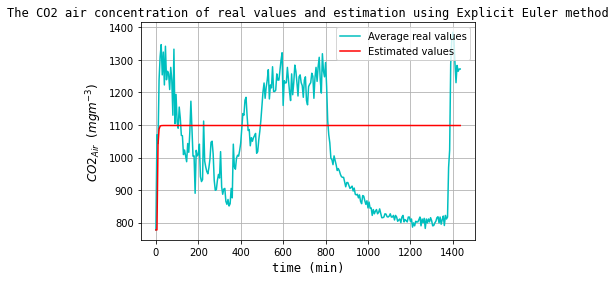

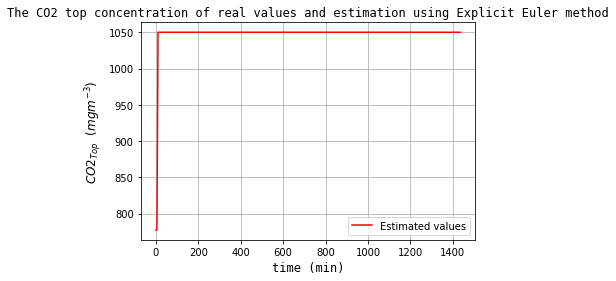

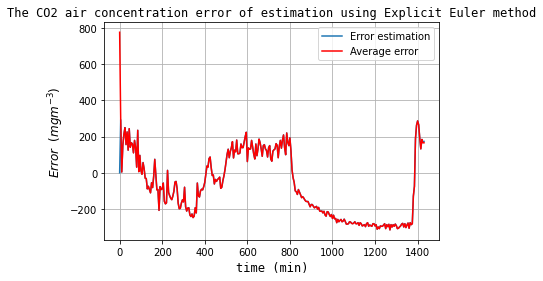

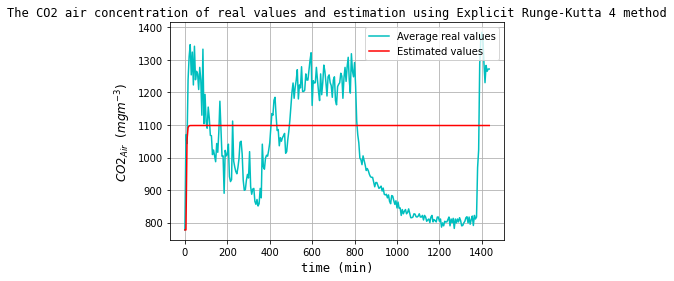

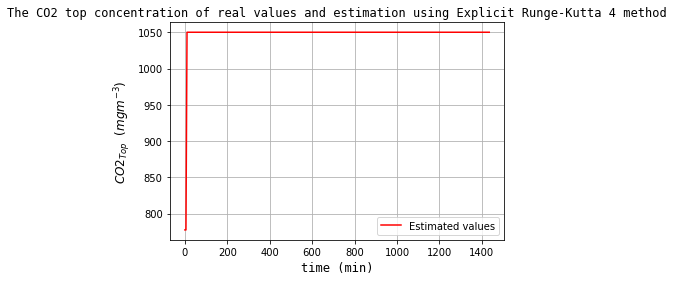

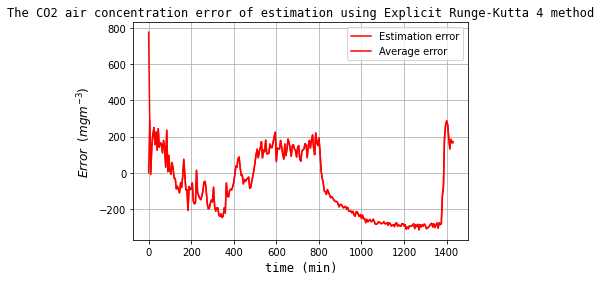

In [ ]:
last = lst *step
erlast = (lst -1) *step
#REAL DATA EULER METHOD:
plot(np.arange(0, last, step), CO2_euler['Air'], "t, realCO2air, euler")
plot(np.arange(0, last, step), CO2_euler['Top'], "t, realCO2top, euler")
#ERROR EULER METHOD:
plot(np.arange(0, erlast, step), ECO2air, "t, errorair, euler")
 
#REAL DATA RK4 METHOD:
plot(np.arange(0, last, step), CO2_rk4['Air'], "t, realCO2air, rk4")
plot(np.arange(0, last, step), CO2_rk4['Top'], "t, realCO2top, rk4")
#ERROR EULER METHOD:
plot(np.arange(0, erlast, step), ECO2air, "t, errorair, rk4")

VP SYSTEM

In [ ]:
VPsystem = greenhouseVPsystem(greenhouseParas)
 
#EULER METHOD:
VP_Air = VP_Air_initial
VP_Top = VP_Top_initial
VP_euler = {'Air': [], 'Top': []}
VP_euler['Air'].append(VP_Air)
VP_euler['Top'].append(VP_Top)
for i in range(0, n-1):
    eul = euler_VP(VPsystem.dx, CO2_euler['Air'][i], VP_Air, VP_Top, h)
    VP_euler['Air'].append(eul['Air'])
    VP_Air = eul['Air']
    VP_euler['Top'].append(eul['Top'])
    VP_Top = eul['Top']
 
#RK4 METHOD:
VP_Air = VP_Air_initial
VP_Top = VP_Top_initial
VP_rk4 = {'Air': [], 'Top': []}
VP_rk4['Air'].append(VP_Air)
VP_rk4['Top'].append(VP_Top)
 
for i in range(0, n-1):
    rkf = rk4_VP(VPsystem.dx, CO2system.dx, CO2_rk4['Air'][i], CO2_rk4['Top'][i], VP_Air, VP_Top, h)
    VP_rk4['Air'].append(rkf['Air'])
    VP_Air = rkf['Air']
    VP_rk4['Top'].append(rkf['Top'])
    VP_Top = rkf['Top']

288
288


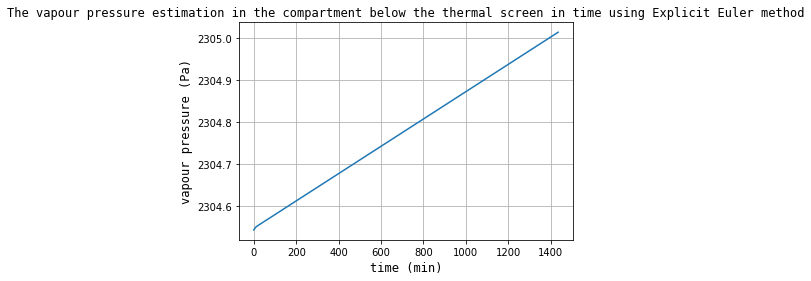

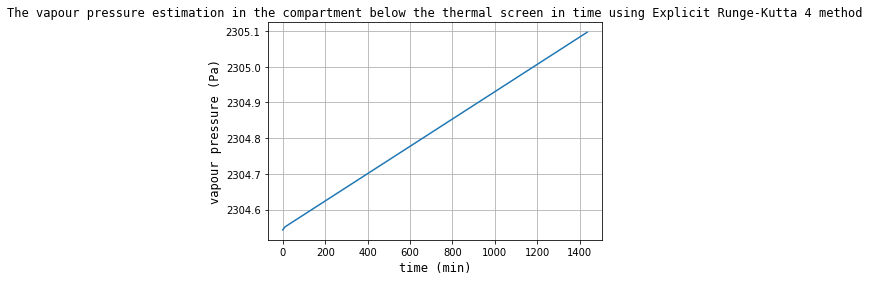

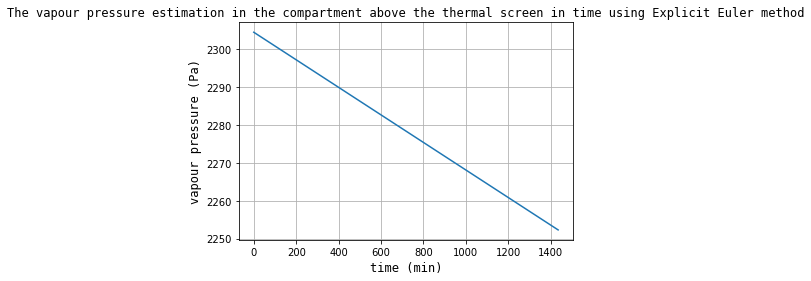

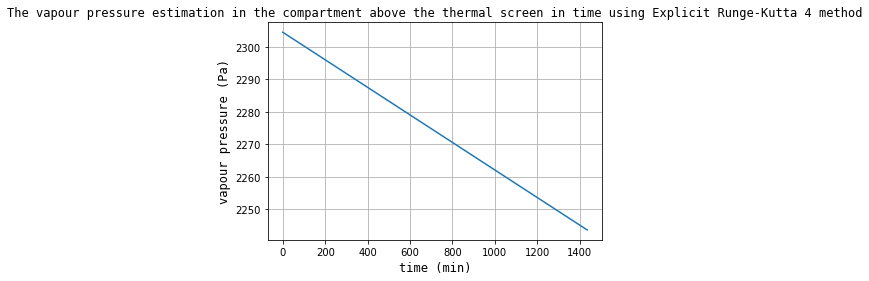

In [ ]:
plot(np.arange(0, last, step), VP_euler['Air'], "t, VP_Air, euler")
plot(np.arange(0, last, step), VP_rk4['Air'], "t, VP_Air, rk4")
plot(np.arange(0, last, step), VP_euler['Top'], "t, VP_Top, euler")
plot(np.arange(0, last, step), VP_rk4['Top'], "t, VP_Top, rk4")